# PCA & tSNE

##### Import Libraries

In [1]:
%config IPCompleter.greedy=True
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import pandas as pd

##### Import Data

In [2]:
data = pd.read_csv("data.csv",header=None) 
label = pd.read_csv("labels.csv",header=None)
data = pd.concat([data,label], axis=1, sort=False, ignore_index=True)
data_available = data.dropna()
data_without_label = data[~data.isin(data_available)].dropna(thresh=100)
data_without_label[186].replace(np.nan, 0, inplace=True)

X = data_available.drop(186, 1)
Y = data_available[186]

W = data_without_label.drop(186, 1)
Z = data_without_label[186]

###### Components

In [3]:
n=30

In [4]:
X = pd.concat([X,W])
Y = pd.concat([Y,Z])

##### Z-Score Normalization

In [5]:
x = stats.zscore(X)

##### Cumulative Variance for all the Features

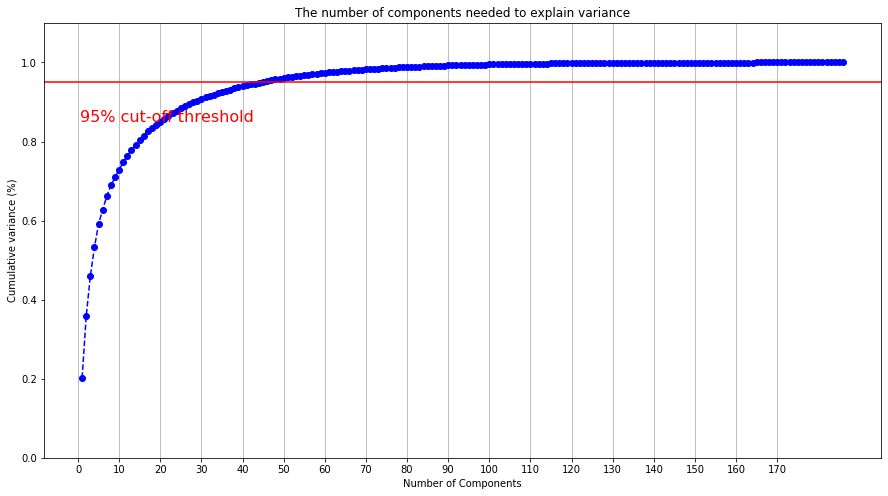

In [6]:
pca = PCA().fit(x)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)

fig, ax = plt.subplots()
xi = np.arange(1, 187, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 180, step=10)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [7]:
pca = PCA(n_components=n,random_state=42)
T = pca.fit_transform(x)
principalComponents = T * (-1)
columns =[]

for i in range(n):
    columns.append('PC'+ str(i))

principalDataframe = pd.DataFrame(data = principalComponents, columns = columns)

In [8]:
targetDataframe = Y
newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

##### PCA Explained variance ratio

In [9]:
pca.explained_variance_ratio_

array([0.20235538, 0.15659095, 0.10091473, 0.07304299, 0.05854078,
       0.03645532, 0.03379644, 0.02708322, 0.02042832, 0.01955096,
       0.01927018, 0.01566495, 0.01471609, 0.01369155, 0.01213623,
       0.01067437, 0.01047451, 0.00888518, 0.00840654, 0.00771838,
       0.0073369 , 0.00721175, 0.00681655, 0.0064299 , 0.00601208,
       0.00533085, 0.00481666, 0.0044819 , 0.00437534, 0.00418217])

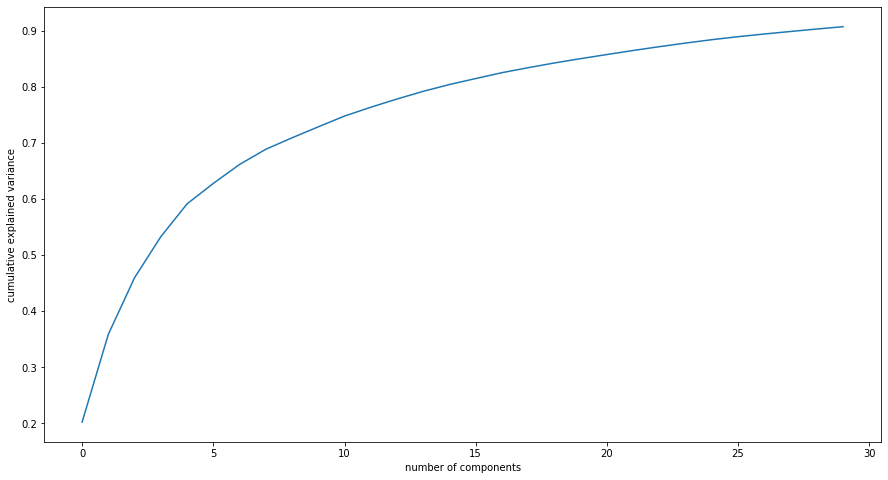

In [10]:
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

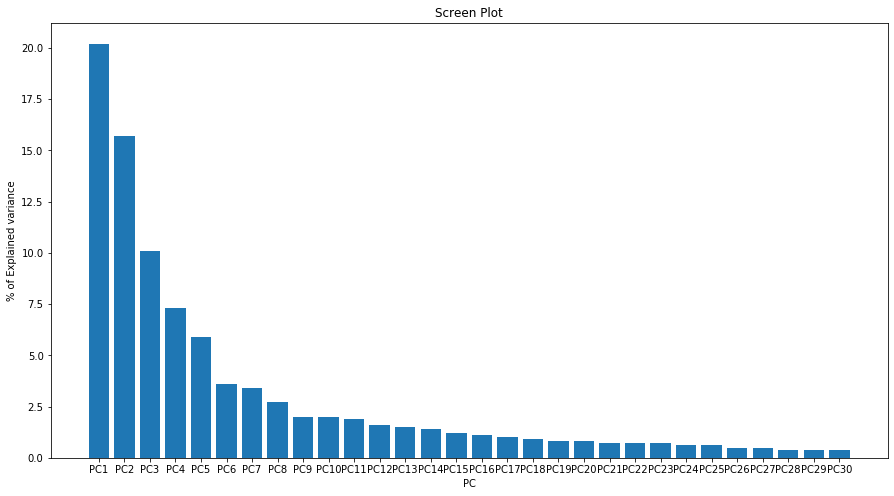

In [11]:
per_var = np.round(pca.explained_variance_ratio_* 100,decimals=1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height = per_var, tick_label= labels)
plt.ylabel('% of Explained variance')
plt.xlabel('PC')
plt.title('Screen Plot')
plt.show()

##### 2-D Principal Component 

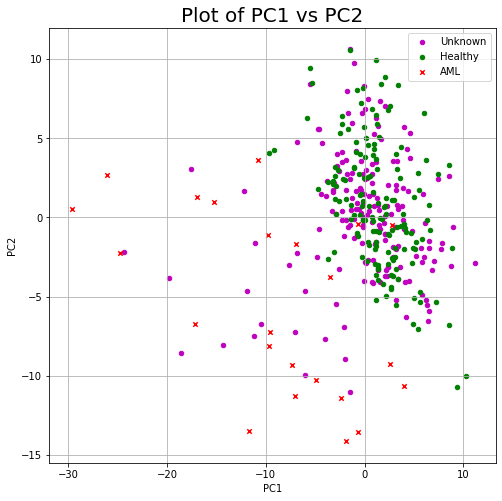

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = [0, 1, 2]
colors = ['m', 'g', 'r']
markers = ['o','o','x']
labels = ['Unknown','Healthy','AML']

for target, color ,marker, label in zip(targets,colors,markers,labels):
    indicesToKeep = newDataframe[186] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC2']
                , marker=marker
               ,label=label
               , c = color
               , s = 20
              )
    
ax.legend(labels)
ax.grid()

##### 3-D Principal Components

In [13]:
dataset = principalComponents
# principalDf = pd.DataFrame(data = dataset, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
columns2 =[]
for i in range(n):
    columns2.append('PC'+ str(i))
principalDf = pd.DataFrame(data = dataset, columns = columns2)

df1 = principalDf.transpose().reset_index(drop=True).transpose()
df2 = Y.transpose().reset_index(drop=True).transpose()

finalDf = pd.concat([df1, df2],axis=1,ignore_index=True)

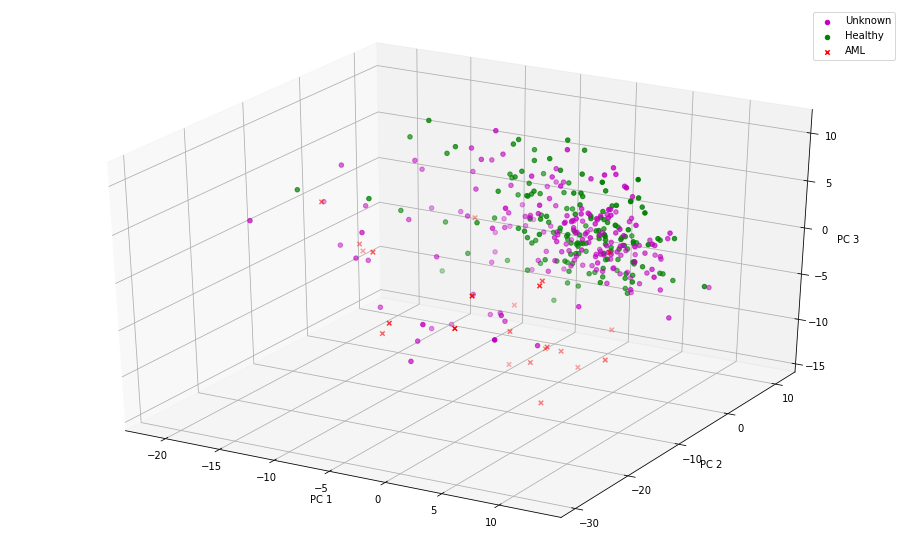

In [14]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
indicesToKeep = finalDf[3]
targets = [0, 1, 2]
colors = ['m', 'g', 'r']
markers = ['o','o','x']
labels = ['Unknown','Healthy','AML']

for target, color ,marker, label in zip(targets,colors,markers,labels):
    indicesToKeep = finalDf[n] == target
    ax.scatter(
    xs=finalDf.loc[indicesToKeep, 0], 
    ys=finalDf.loc[indicesToKeep, 1], 
    zs=finalDf.loc[indicesToKeep, 2], 
    marker=marker
    ,label=label
    , c = color
    , s = 20
    ,cmap='tab10'
    )
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.legend(labels)
plt.show()

Healthy Patients Box-Plot


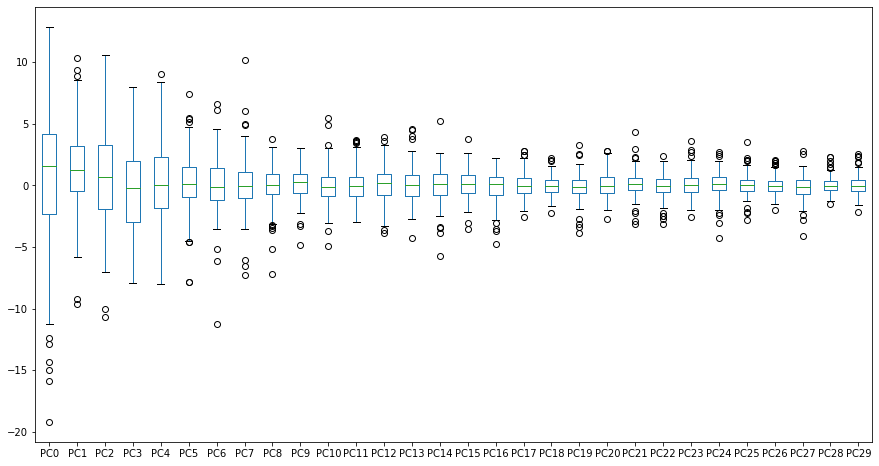

unHealthy Patients Box-Plot


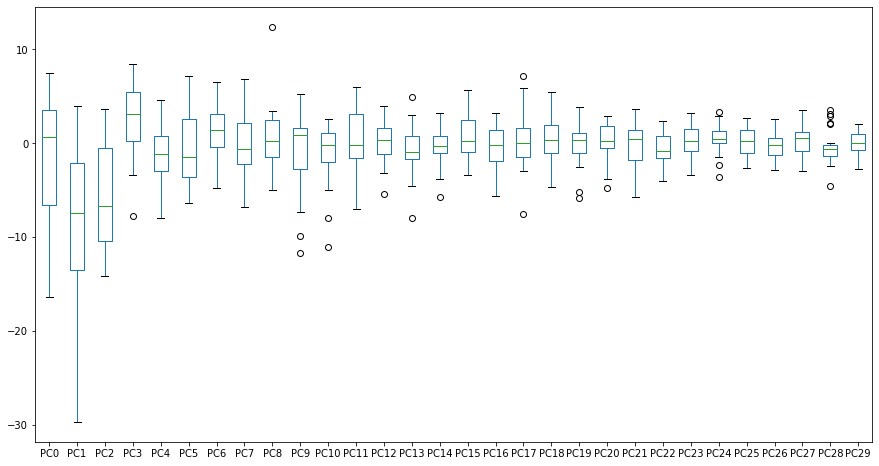

unknown Patients Box-Plot


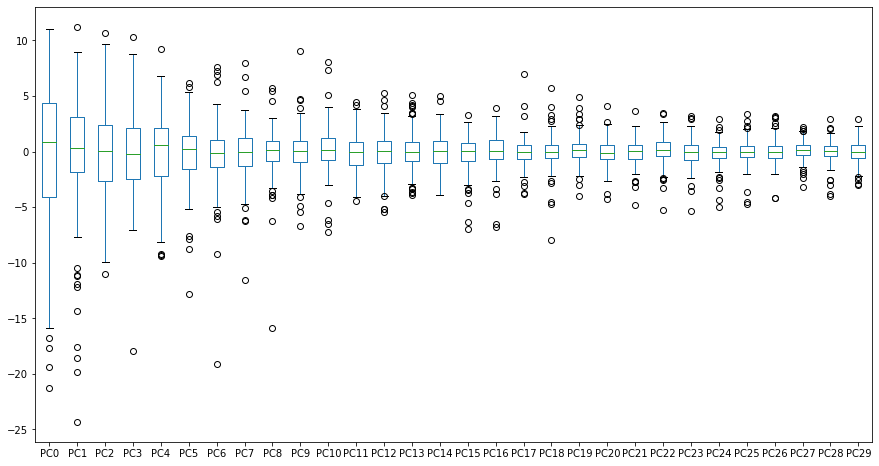

In [15]:
healthyPatientsC = newDataframe[186] == 1.0
unHealthyPatientsC = newDataframe[186] == 2.0
unknownPatientsC = newDataframe[186] == 0.0

healthyPatientsBox = newDataframe[healthyPatientsC]
unHealthyPatientsBox = newDataframe[unHealthyPatientsC]
unknownPatientsBox = newDataframe[unknownPatientsC]

print("Healthy Patients Box-Plot")
healthyPatientsBox.drop(186, 1).plot.box()
plt.show() 
print("unHealthy Patients Box-Plot")
unHealthyPatientsBox.drop(186, 1).plot.box()
plt.show()
print("unknown Patients Box-Plot")
unknownPatientsBox.drop(186, 1).plot.box()
plt.show() 

##### Important 30 Features

In [16]:
load_scores = pd.Series(pca.components_[0])
sorted_loading_scores = load_scores.abs().sort_values(ascending = False)
top_10 = sorted_loading_scores[0:30].index.values
print(load_scores[top_10])

55     0.139297
73     0.138225
31     0.133055
59     0.131493
8      0.131120
77     0.128857
139    0.126400
156    0.125386
115    0.123854
157    0.120431
2      0.119140
158   -0.118855
53     0.118247
36    -0.117681
25     0.117617
49     0.117521
0     -0.116981
4     -0.116247
29     0.116030
67     0.114805
23     0.112858
6     -0.112098
143    0.111287
40    -0.110945
161    0.110793
179    0.110548
101    0.108820
71     0.108464
140   -0.107429
38     0.106994
dtype: float64


##### Important features for each Principal Components

In [17]:
# number of components
n_pcs= pca.components_.shape[0]

most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = []
for i in range(186):
    initial_feature_names.append(i)
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,55
1,PC1,121
2,PC2,48
3,PC3,134
4,PC4,102
5,PC5,12
6,PC6,80
7,PC7,144
8,PC8,162
9,PC9,47


## tSNE

In [21]:
pca_35 = PCA(n_components=30)
pca_result_35 = pca_35.fit_transform(x)
print('Cumulative explained variation for 35 principal components: {}'.format(np.sum(pca_35.explained_variance_ratio_)))

Cumulative explained variation for 35 principal components: 0.907391188877835


In [23]:
from __future__ import print_function
import time
from sklearn.manifold import TSNE


t-SNE done! Time elapsed: 1.0639395713806152 seconds


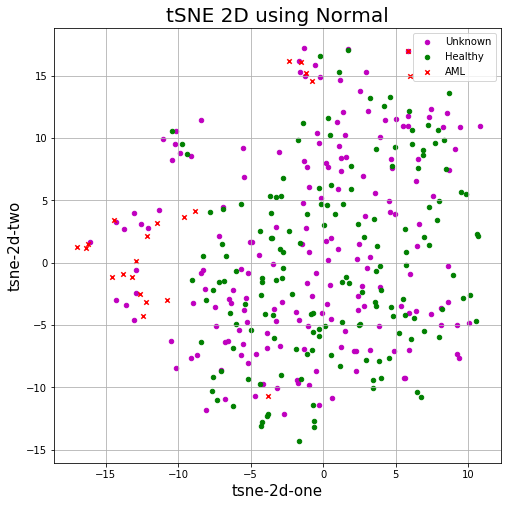

In [24]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=600, random_state=0)
tsne_pca_results = tsne.fit_transform(pca_result_35)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
finalDf['tsne-2d-one'] = tsne_pca_results[:,0]
finalDf['tsne-2d-two'] = tsne_pca_results[:,1]
# metric='chebyshev'
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne-2d-one', fontsize = 15)
ax.set_ylabel('tsne-2d-two', fontsize = 15)
ax.set_title('tSNE 2D using Normal', fontsize = 20)

targets = [0, 1, 2]
colors = ['m', 'g', 'r']
markers = ['o','o','x']
labels = ['Unknown','Healthy','AML']

for target, color ,marker, label in zip(targets,colors,markers,labels):
    indicesToKeep = finalDf[30] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'tsne-2d-one']
               , finalDf.loc[indicesToKeep, 'tsne-2d-two']
                ,marker=marker
                ,label=label
                , c = color
                , s = 20)

ax.legend(labels)
ax.grid()

t-SNE done! Time elapsed: 3.842641830444336 seconds


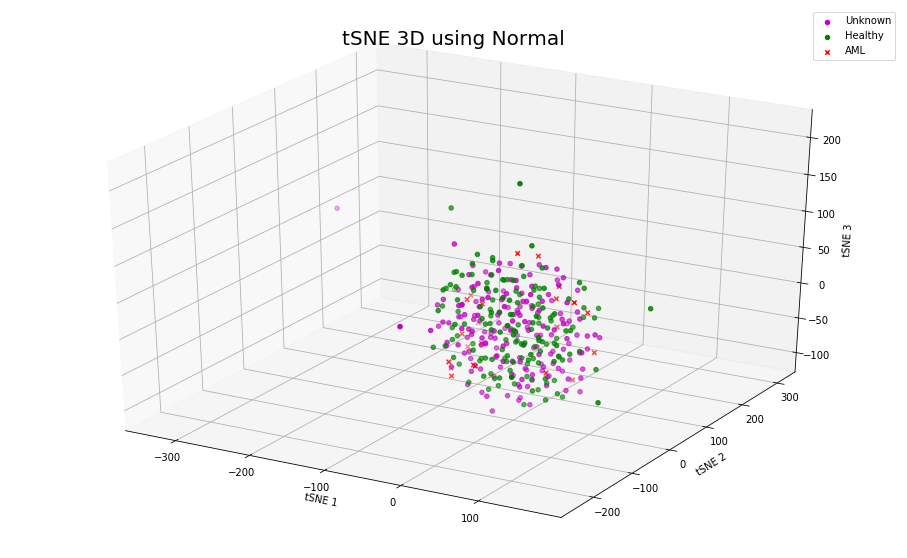

In [25]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=0, perplexity=40, n_iter=600,random_state=0)
tsne_pca_results = tsne.fit_transform(pca_result_35)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
finalDf['tsne-2d-one'] = tsne_pca_results[:,0]
finalDf['tsne-2d-two'] = tsne_pca_results[:,1]
finalDf['tsne-2d-three'] = tsne_pca_results[:,2]
# metric='chebyshev'
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.set_title('tSNE 3D using Normal', fontsize = 20)

targets = [0, 1, 2]
colors = ['m', 'g', 'r']
markers = ['o','o','x']
labels = ['Unknown','Healthy','AML']

for target, color ,marker, label in zip(targets,colors,markers,labels):
    indicesToKeep = finalDf[n] == target
    ax.scatter(
    xs=finalDf.loc[indicesToKeep, 'tsne-2d-one'], 
    ys=finalDf.loc[indicesToKeep, 'tsne-2d-two'], 
    zs=finalDf.loc[indicesToKeep, 'tsne-2d-three'], 
    marker=marker
    ,label=label
    , c = color
    , s = 20
    ,cmap='tab10'
    )
ax.set_xlabel('tSNE 1')
ax.set_ylabel('tSNE 2')
ax.set_zlabel('tSNE 3')
ax.legend(labels)
plt.show()

t-SNE done! Time elapsed: 0.5330569744110107 seconds


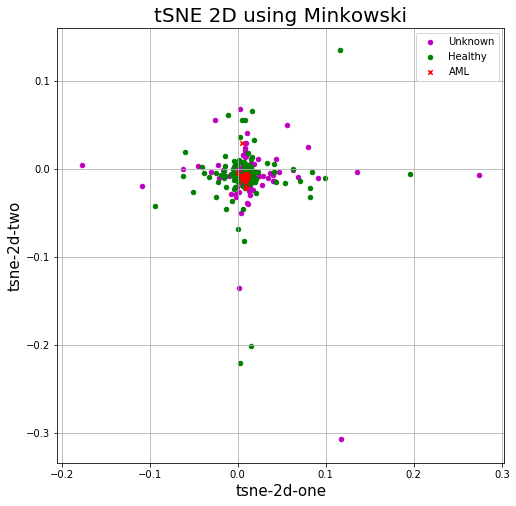

In [26]:
time_start = time.time()
tsne = TSNE(n_components=2,metric='minkowski',perplexity=40,n_iter=250,learning_rate=50, random_state=0)
tsne_pca_results = tsne.fit_transform(pca_result_35)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
finalDf['tsne-2d-one'] = tsne_pca_results[:,0]
finalDf['tsne-2d-two'] = tsne_pca_results[:,1]
# metric='chebyshev'
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne-2d-one', fontsize = 15)
ax.set_ylabel('tsne-2d-two', fontsize = 15)
ax.set_title('tSNE 2D using Minkowski', fontsize = 20)

targets = [0, 1, 2]
colors = ['m', 'g', 'r']
markers = ['o','o','x']
labels = ['Unknown','Healthy','AML']

for target, color ,marker, label in zip(targets,colors,markers,labels):
    indicesToKeep = finalDf[30] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'tsne-2d-one']
               , finalDf.loc[indicesToKeep, 'tsne-2d-two']
                ,marker=marker
                ,label=label
                , c = color
                , s = 20)
ax.legend(labels)
ax.grid()

t-SNE done! Time elapsed: 1.0049982070922852 seconds


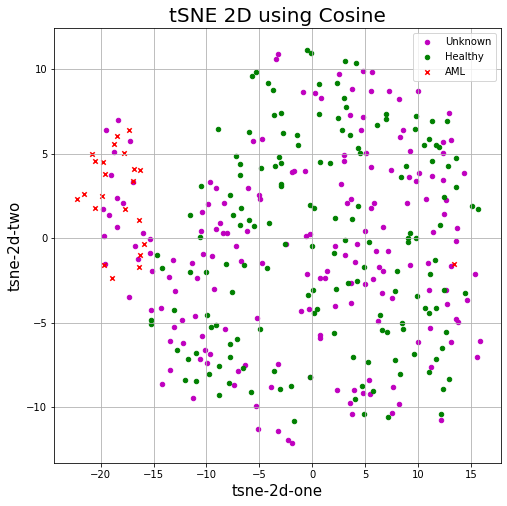

In [28]:
time_start = time.time()
tsne = TSNE(n_components=2,metric="cosine",verbose=0, perplexity=40, n_iter=600,random_state=0)
tsne_pca_results = tsne.fit_transform(pca_result_35)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
finalDf['tsne-2d-one'] = tsne_pca_results[:,0]
finalDf['tsne-2d-two'] = tsne_pca_results[:,1]
# metric='chebyshev'
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne-2d-one', fontsize = 15)
ax.set_ylabel('tsne-2d-two', fontsize = 15)
ax.set_title('tSNE 2D using Cosine', fontsize = 20)

targets = [0, 1, 2]
colors = ['m', 'g', 'r']
markers = ['o','o','x']
labels = ['Unknown','Healthy','AML']
for target, color ,marker, label in zip(targets,colors,markers,labels):
    indicesToKeep = finalDf[30] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'tsne-2d-one']
               , finalDf.loc[indicesToKeep, 'tsne-2d-two']
               ,marker=marker
                ,label=label
                , c = color
                , s = 20)
ax.legend(labels)
ax.grid()

t-SNE done! Time elapsed: 1.0669960975646973 seconds


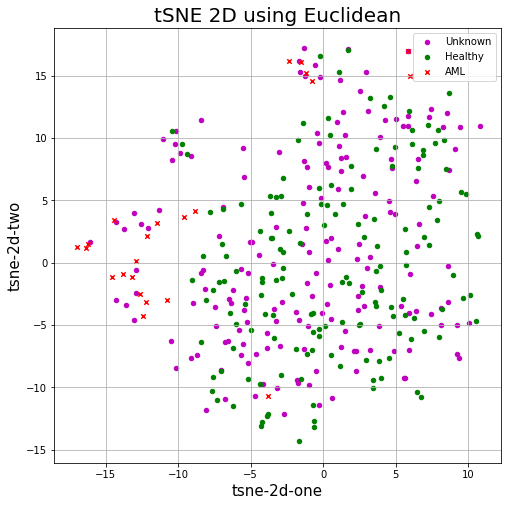

In [29]:
time_start = time.time()
tsne = TSNE(n_components=2,metric="euclidean",verbose=0, perplexity=40, n_iter=600,random_state=0)
tsne_pca_results = tsne.fit_transform(pca_result_35)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
finalDf['tsne-2d-one'] = tsne_pca_results[:,0]
finalDf['tsne-2d-two'] = tsne_pca_results[:,1]
# metric='chebyshev'
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne-2d-one', fontsize = 15)
ax.set_ylabel('tsne-2d-two', fontsize = 15)
ax.set_title('tSNE 2D using Euclidean', fontsize = 20)

targets = [0, 1, 2]
colors = ['m', 'g', 'r']
markers = ['o','o','x']
labels = ['Unknown','Healthy','AML']
for target, color ,marker, label in zip(targets,colors,markers,labels):
    indicesToKeep = finalDf[30] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'tsne-2d-one']
               , finalDf.loc[indicesToKeep, 'tsne-2d-two']
               ,marker=marker
                ,label=label
                , c = color
                , s = 20)
ax.legend(labels)
ax.grid()

t-SNE done! Time elapsed: 1.0980000495910645 seconds


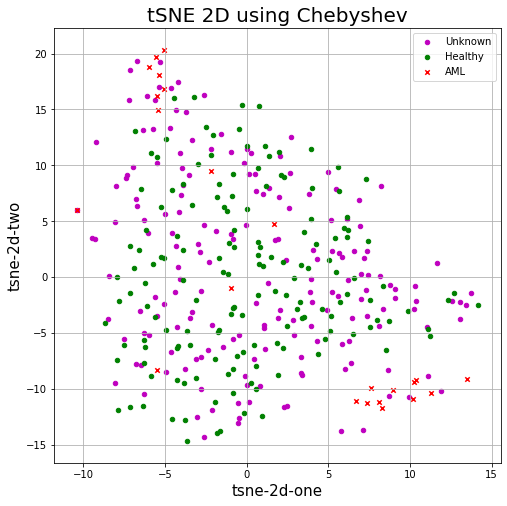

In [30]:
time_start = time.time()
tsne = TSNE(n_components=2,metric='chebyshev',verbose=0, perplexity=40, n_iter=600,random_state=0)
tsne_pca_results = tsne.fit_transform(pca_result_35)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
finalDf['tsne-2d-one'] = tsne_pca_results[:,0]
finalDf['tsne-2d-two'] = tsne_pca_results[:,1]
# metric='chebyshev'
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne-2d-one', fontsize = 15)
ax.set_ylabel('tsne-2d-two', fontsize = 15)
ax.set_title('tSNE 2D using Chebyshev', fontsize = 20)

targets = [0, 1, 2]
colors = ['m', 'g', 'r']
markers = ['o','o','x']
labels = ['Unknown','Healthy','AML']
for target, color ,marker, label in zip(targets,colors,markers,labels):
    indicesToKeep = finalDf[30] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'tsne-2d-one']
               , finalDf.loc[indicesToKeep, 'tsne-2d-two']
               ,marker=marker
                ,label=label
                , c = color
                , s = 20)
ax.legend(labels)
ax.grid()